# **Import Libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer

# **Read Data**

In [15]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Nigerian_Road_Traffic_Crashes_2020_2024.csv')

In [16]:
df = data.copy()

In [17]:
df

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...
513,Q1 2024,Rivers,15,32,4,21,17,0,0,0,4
514,Q1 2024,Sokoto,24,122,41,52,41,0,0,0,11
515,Q1 2024,Taraba,38,98,17,38,17,0,0,0,21
516,Q1 2024,Yobe,39,234,13,55,38,0,0,0,17


In [18]:
data_types = df.dtypes
print(data_types)

Quarter                    object
State                      object
Total_Crashes               int64
Num_Injured                 int64
Num_Killed                  int64
Total_Vehicles_Involved     int64
SPV                         int64
DAD                         int64
PWR                         int64
FTQ                         int64
Other_Factors               int64
dtype: object


In [19]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1C4RJXN66R,Snohomish,Everett,WA,98204.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,21.0,261311557,POINT (-122.2507211 47.8976713),PUGET SOUND ENERGY INC,5.306104e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.1476337 47.4438471),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EA3L,King,Seattle,WA,98125.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,46.0,124517347,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1G1RC6S5XH,Kitsap,Port Orchard,WA,98367.0,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,26.0,7832933,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09P,Snohomish,Monroe,WA,98272.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,39.0,235249262,POINT (-121.968385 47.854897),PUGET SOUND ENERGY INC,5.306105e+10


In [20]:
df.describe()

,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,83.517375,245.631274,40.600386,100.667954,37.903475,0.140927,0.355212,23.824324,38.444015
std,77.023061,201.131483,36.858302,108.567113,57.093042,0.454320,1.677385,51.024267,61.983992
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-348.000000
25%,30.000000,96.250000,15.000000,32.000000,0.000000,0.000000,0.000000,0.000000,12.000000
50%,58.000000,185.500000,30.000000,64.000000,15.000000,0.000000,0.000000,0.000000,27.000000
75%,107.750000,331.500000,55.750000,134.750000,55.000000,0.000000,0.000000,21.000000,57.000000
max,538.000000,1149.000000,224.000000,864.000000,340.000000,4.000000,25.000000,425.000000,586.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In [23]:
df.isnull().sum()

,0
Quarter,0
State,0
Total_Crashes,0
Num_Injured,0
Num_Killed,0
Total_Vehicles_Involved,0
SPV,0
DAD,0
PWR,0
FTQ,0


<Axes: >

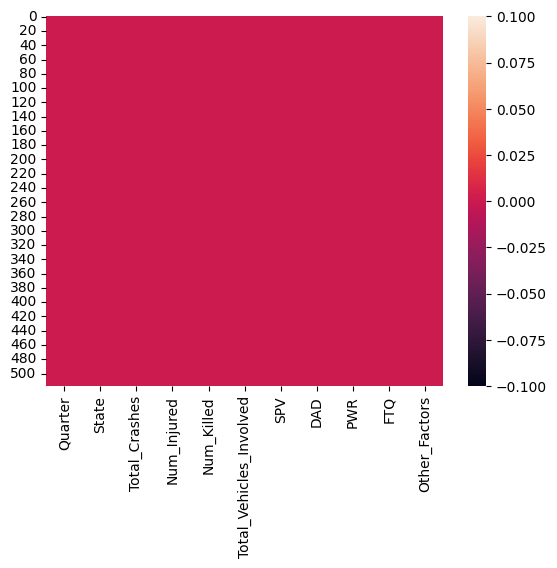

In [24]:
sns.heatmap(df.isnull())

In [25]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

In [12]:
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


<Axes: >

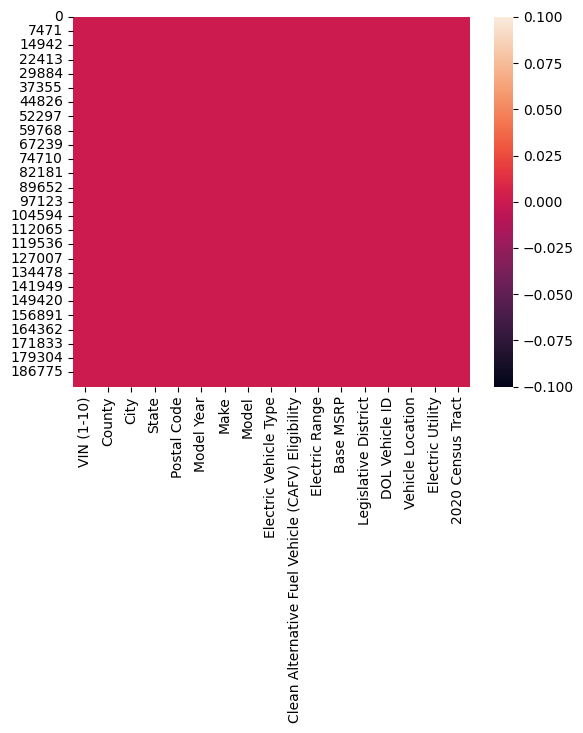

In [13]:
sns.heatmap(df.isnull())

# **Identifying outliers using Z-score**

In [26]:
from scipy import stats

# Calculate Z-scores of each value in the DataFrame
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))

# Identify outliers (Z-score > 3 or < -3)
df_outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]
print(df_outliers)

     Quarter     State  Total_Crashes  Num_Injured  Num_Killed  \
14   Q4 2020       FCT            312          572          90   
18   Q4 2020    Kaduna            281         1010         224   
19   Q4 2020      Kano            102          499         194   
27   Q4 2020      Ogun            279          548          83   
31   Q4 2020   Plateau             45          123          17   
51   Q1 2021       FCT            278          518          56   
55   Q1 2021    Kaduna            256         1149         196   
64   Q1 2021      Ogun            299          670          82   
88   Q2 2021       FCT            252          483          37   
92   Q2 2021    Kaduna            222          837         217   
97   Q2 2021     Kwara            108          368          80   
99   Q2 2021  Nasarawa            242          600          53   
101  Q2 2021      Ogun            337          637         121   
102  Q2 2021      Ondo            114          299          47   
125  Q3 20

In [27]:
# Remove rows with outliers based on Z-score
df_no_outliers = df[(z_scores < 3).all(axis=1) & (z_scores > -3).all(axis=1)]

# **Data Analysis**

## **1) How many Total Crashes by State?**

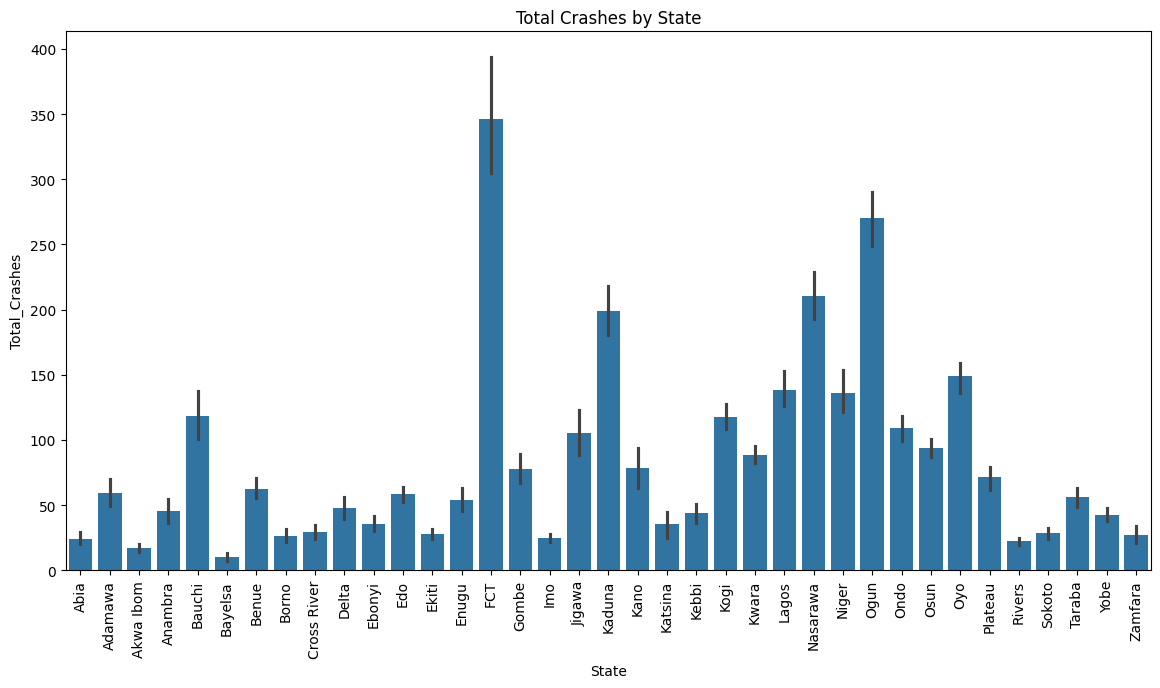

In [28]:
# Bar plot of Total Crashes by State
plt.figure(figsize=(14, 7))
sns.barplot(x='State', y='Total_Crashes', data=df)
plt.title('Total Crashes by State')
plt.xticks(rotation=90)
plt.show()

## **2)Total Vehcils Involved?**

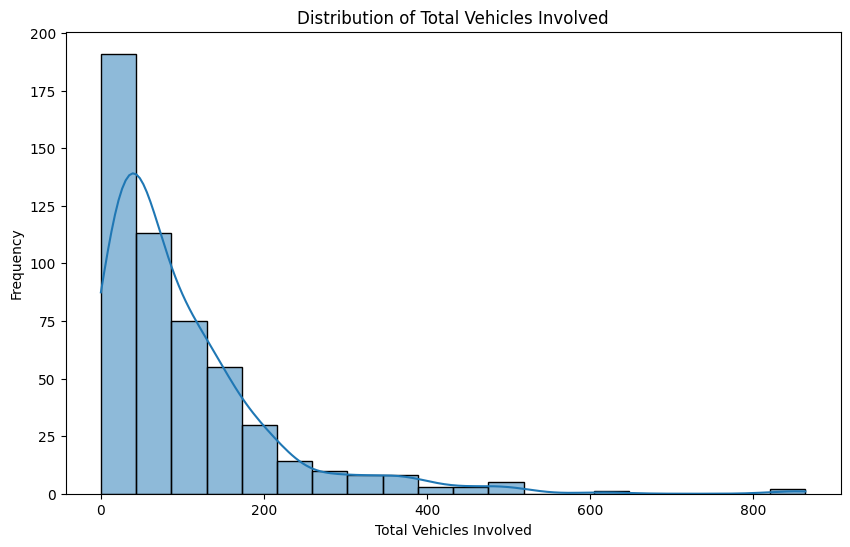

In [29]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Vehicles_Involved'], bins=20, kde=True)
plt.title('Distribution of Total Vehicles Involved')
plt.xlabel('Total Vehicles Involved')
plt.ylabel('Frequency')
plt.show()

## **3)Number of Injuries by Quarter?**

In [30]:
fig = px.bar(df, x='Quarter', y='Num_Injured', color='State', title='Number of Injuries by Quarter')
fig.show()

## **4) Factors Contributing to Crashes (SPV, DAD, PWR, FTQ, Other_Factors)?**

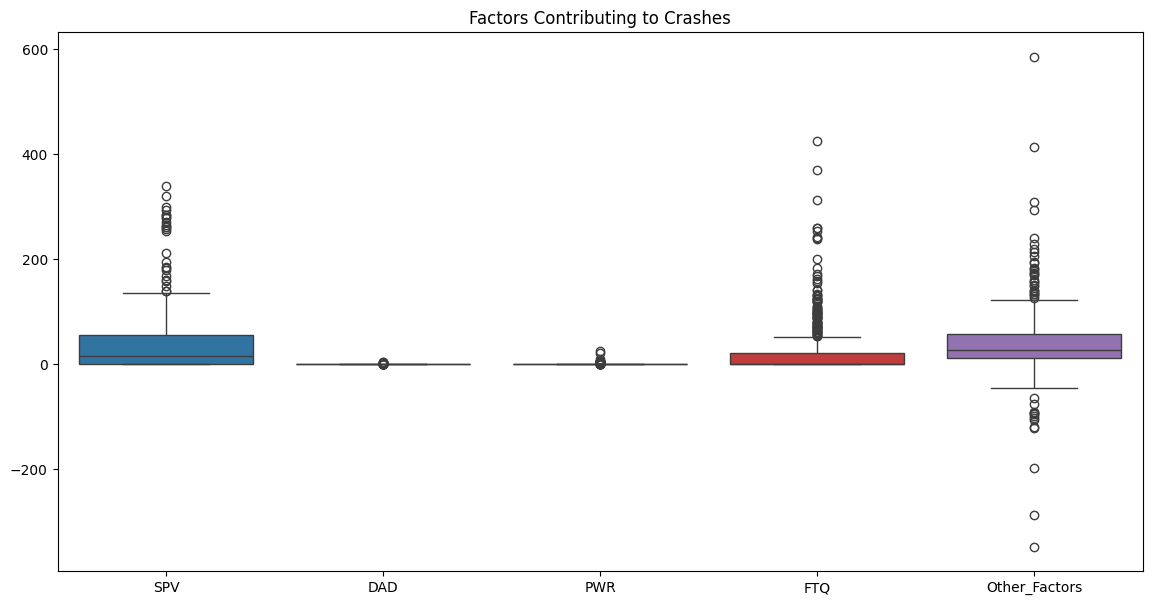

In [31]:
factors = ['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']

plt.figure(figsize=(14, 7))
sns.boxplot(data=df[factors])
plt.title('Factors Contributing to Crashes')
plt.show()

## **5) Correlation Heatmap**

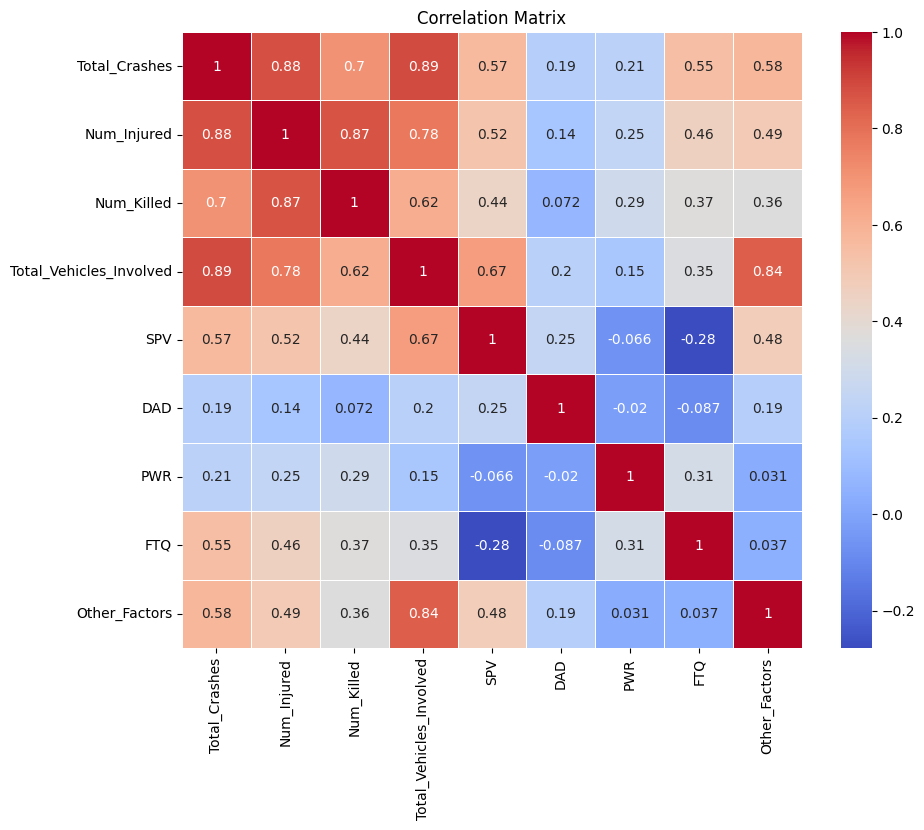

In [32]:
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **6)Total Crashes Over Quarters?**

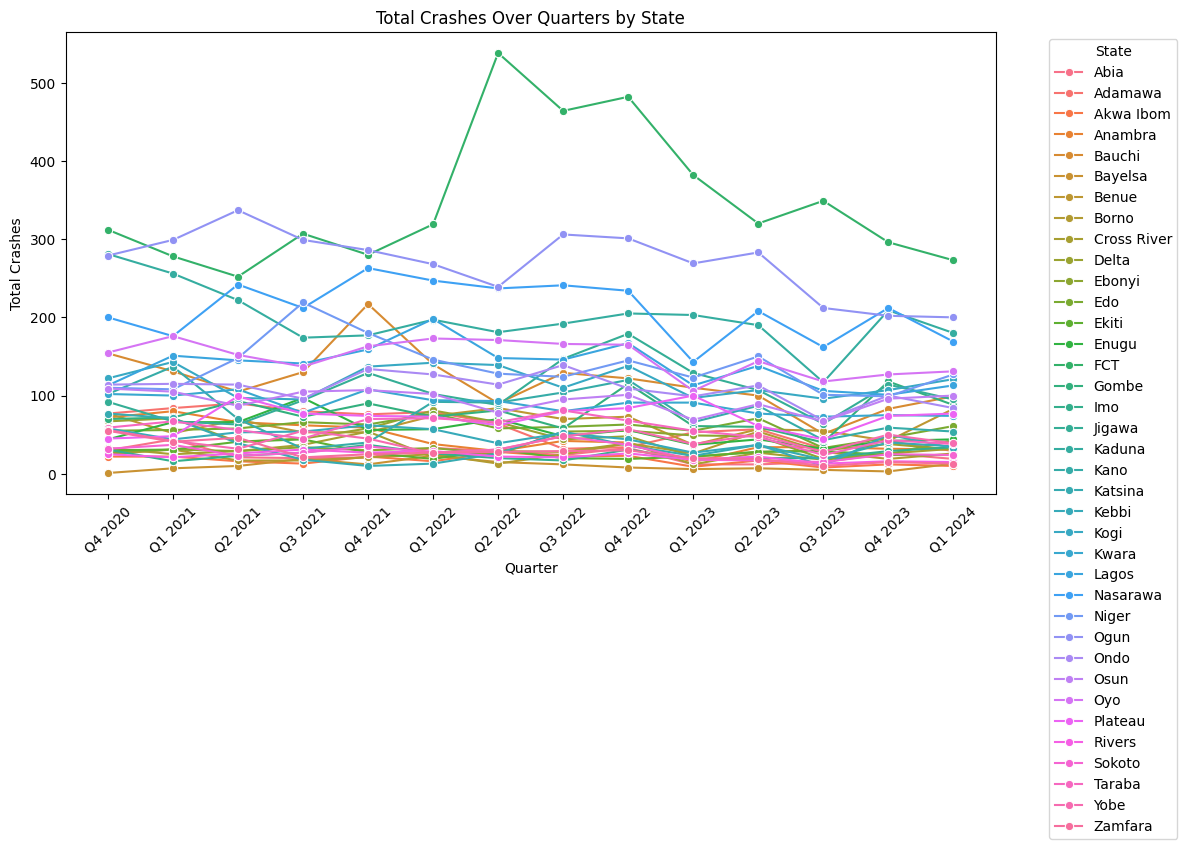

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Quarter', y='Total_Crashes', hue='State', data=df, marker='o')
plt.title('Total Crashes Over Quarters by State')
plt.xlabel('Quarter')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **7)Total Vehicles Involved and Number of Injuries?**

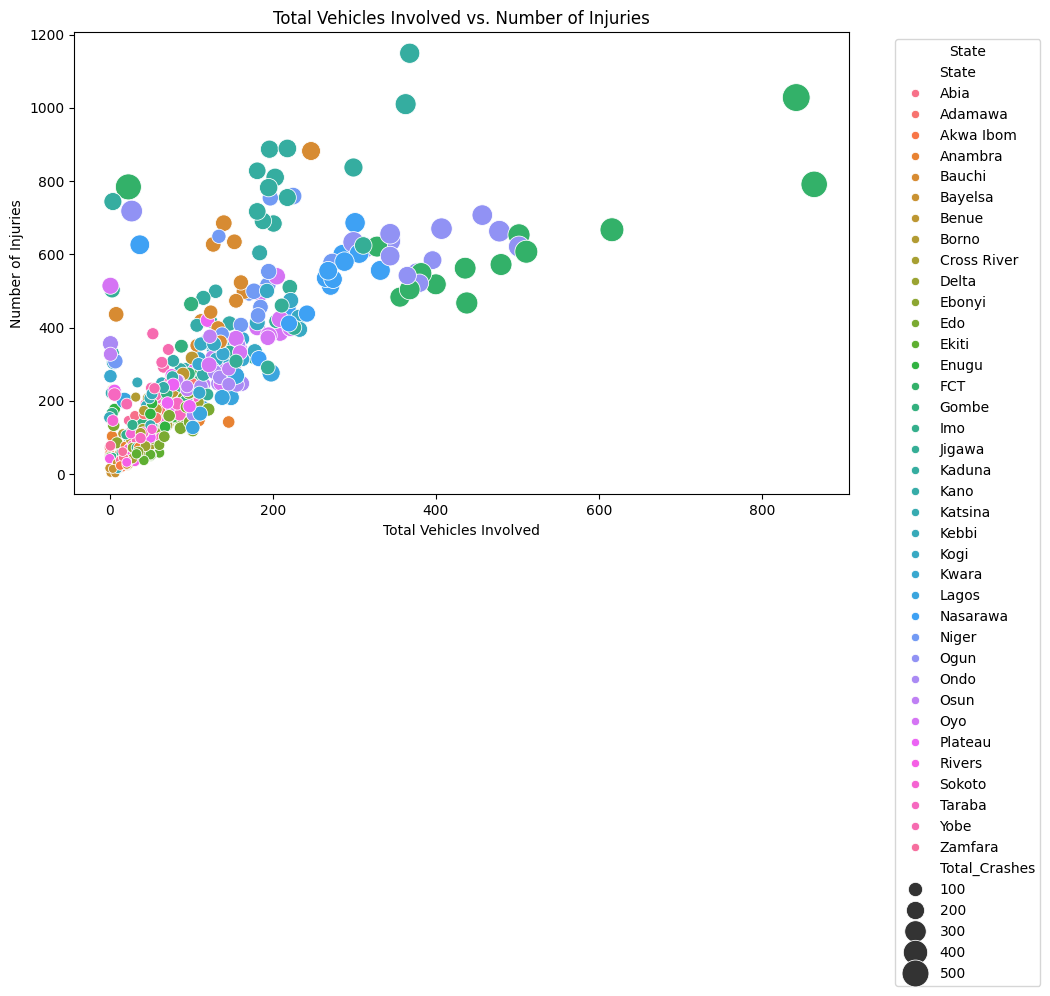

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Vehicles_Involved', y='Num_Injured', hue='State', size='Total_Crashes', data=df, sizes=(40, 400))
plt.title('Total Vehicles Involved vs. Number of Injuries')
plt.xlabel('Total Vehicles Involved')
plt.ylabel('Number of Injuries')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **8) Proportion of Total Crashes by State**


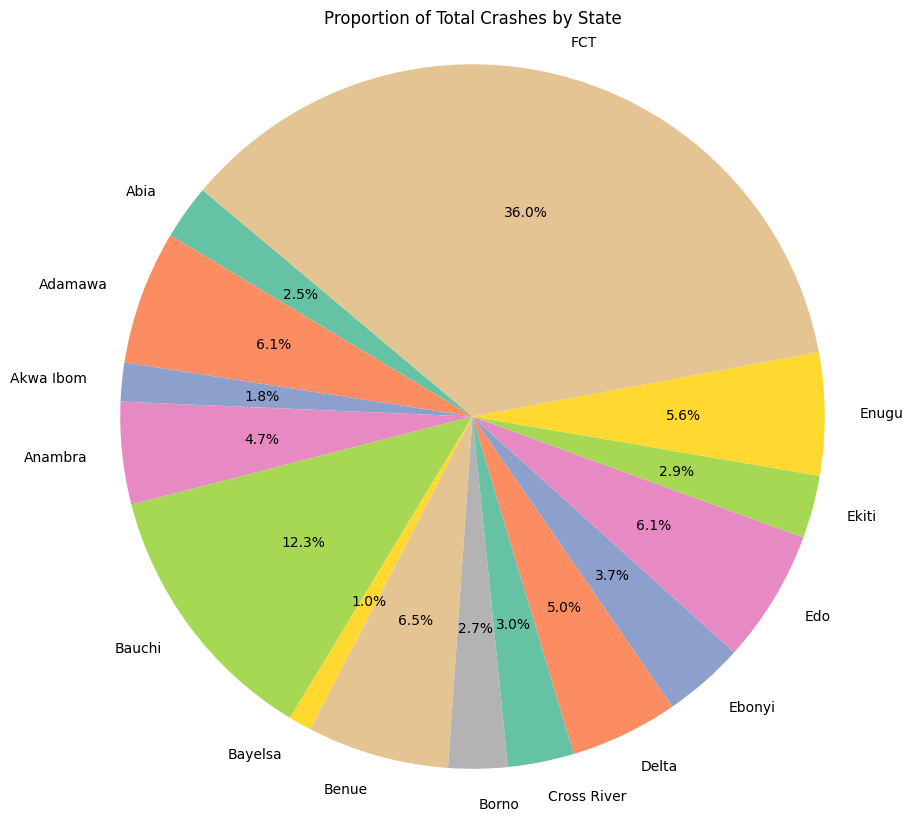

In [37]:
# Pie chart to visualize the proportion of Total Crashes by State
state_crashes = df.groupby('State')['Total_Crashes'].sum().head(15)

plt.figure(figsize=(10, 10))
plt.pie(state_crashes, labels=state_crashes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(state_crashes)))
plt.title('Proportion of Total Crashes by State')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## **9)Average Number of Injuries by State**


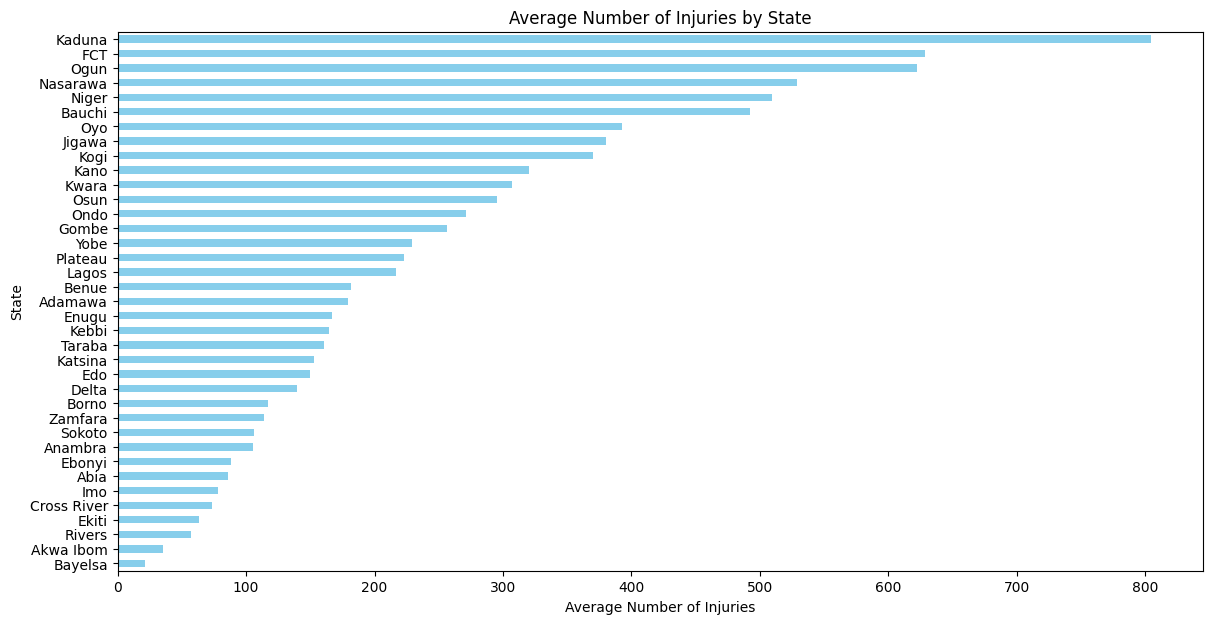

In [38]:
avg_injuries_by_state = df.groupby('State')['Num_Injured'].mean().sort_values()

plt.figure(figsize=(14, 7))
avg_injuries_by_state.plot(kind='barh', color='skyblue')
plt.title('Average Number of Injuries by State')
plt.xlabel('Average Number of Injuries')
plt.ylabel('State')
plt.show()

## **10) Exploring Relationships Among Multiple Numeric Features**


<Figure size 1200x1200 with 0 Axes>

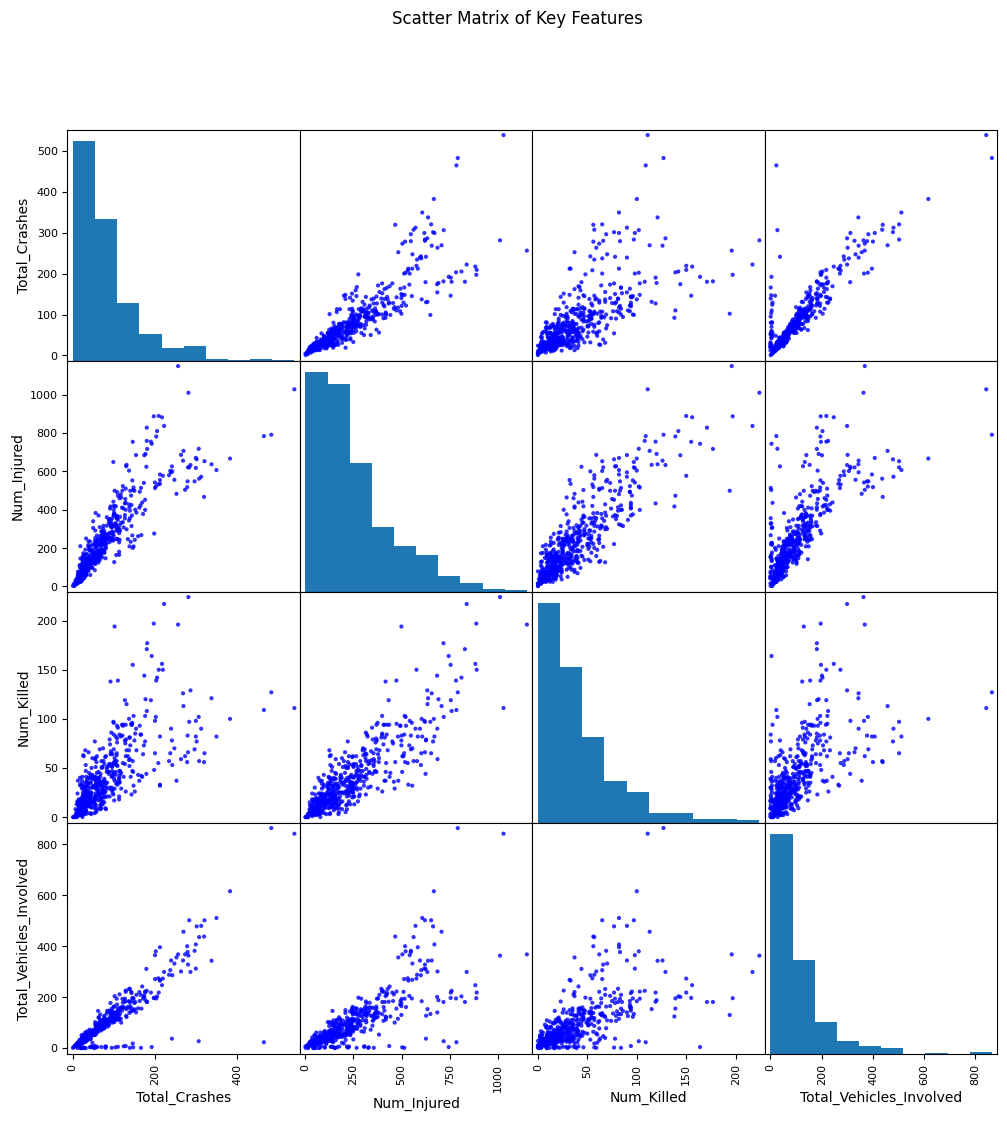

In [39]:
from pandas.plotting import scatter_matrix

# Scatter matrix to explore relationships among multiple numeric features
numeric_columns = ['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved']

plt.figure(figsize=(12, 12))
scatter_matrix(df[numeric_columns], alpha=0.8, figsize=(12, 12), diagonal='hist', color='blue')
plt.suptitle('Scatter Matrix of Key Features')
plt.show()

## **11)Factors Contributing to Road Crashes (SPV, DAD, PWR, FTQ)**


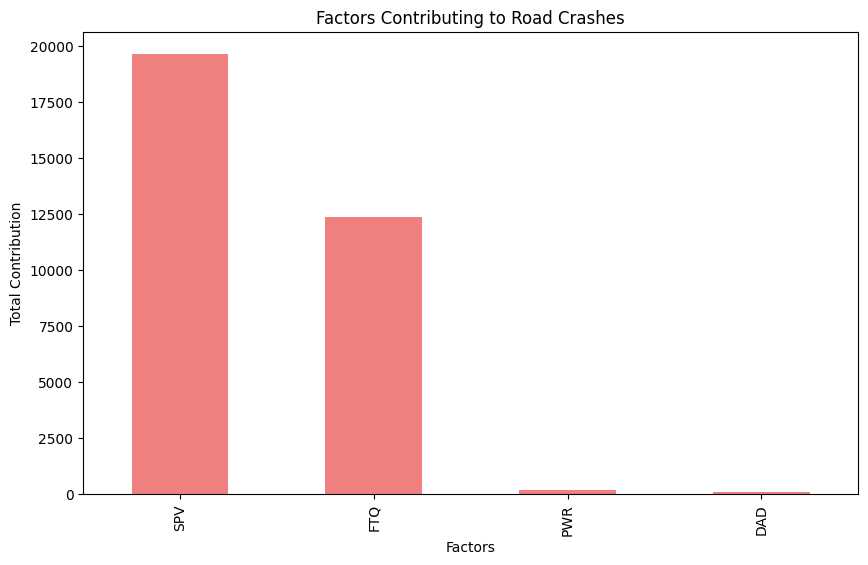

In [41]:


# Aggregating factors contributing to crashes
factor_sums = df[['SPV', 'DAD', 'PWR', 'FTQ']].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
factor_sums.plot(kind='bar', color='lightcoral')
plt.title('Factors Contributing to Road Crashes')
plt.xlabel('Factors')
plt.ylabel('Total Contribution')
plt.show()



## **12)Breakdown of Injuries and Fatalities by State**

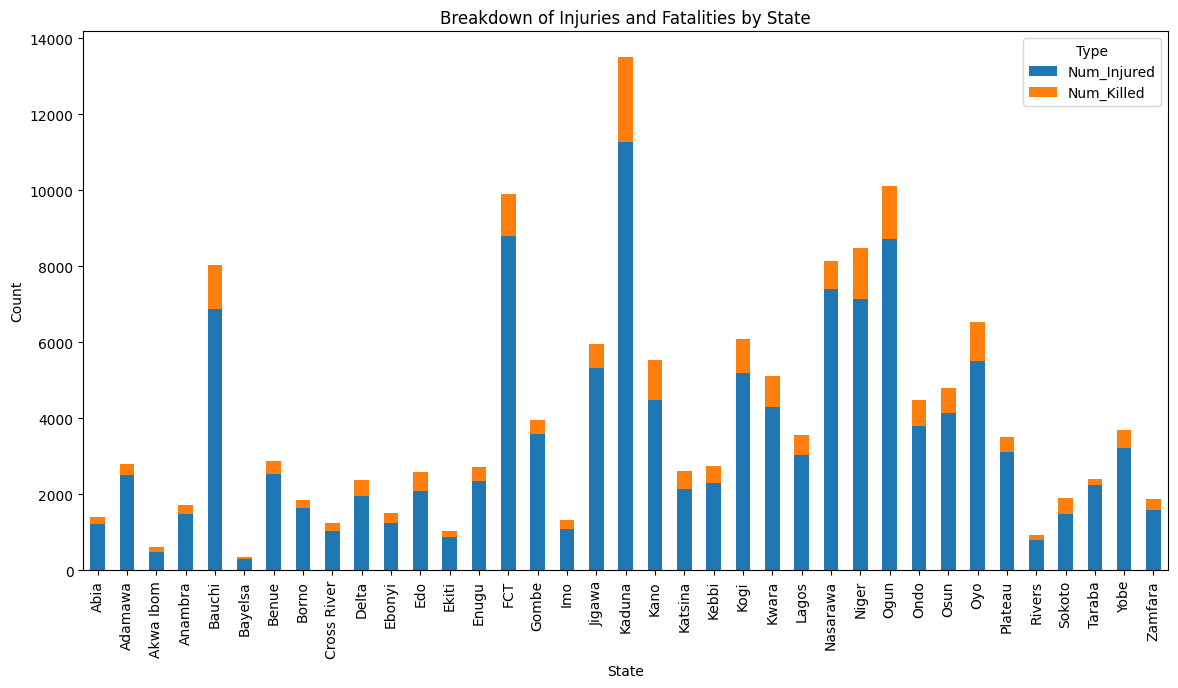

In [42]:
injuries_fatalities = df.groupby('State')[['Num_Injured', 'Num_Killed']].sum()

injuries_fatalities.plot(kind='bar', stacked=True, figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])
plt.title('Breakdown of Injuries and Fatalities by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

## **13)Trends in Crashes Over Quarters**


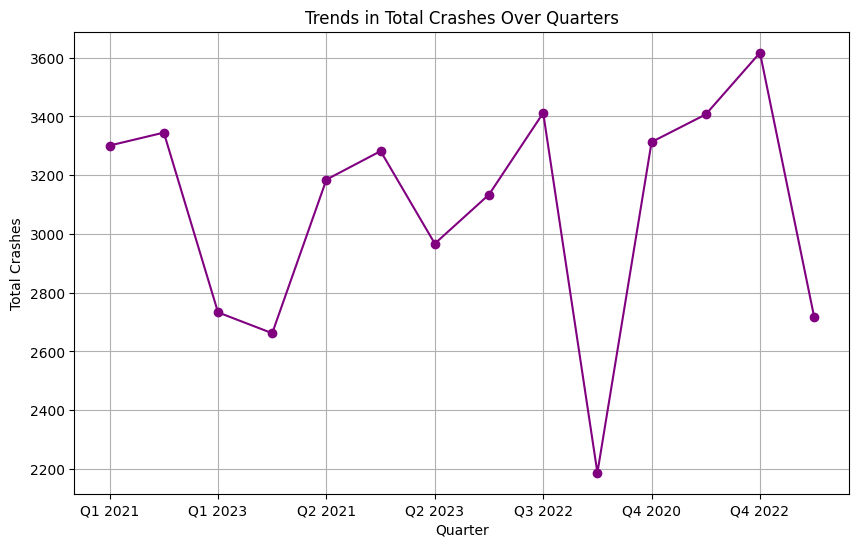

In [45]:
df_grouped_quarter = df.groupby('Quarter')['Total_Crashes'].sum()

plt.figure(figsize=(10, 6))
df_grouped_quarter.plot(kind='line', marker='o', color='purple')
plt.title('Trends in Total Crashes Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Total Crashes')
plt.grid(True)
plt.show()

## **14)Crashes by State (If State Codes Represent Regions)**


In [46]:
# Geographical visualization (if State represents a location with latitude/longitude or geo codes)
fig = px.choropleth(df,
                    locations='State',
                    locationmode='country names',
                    color='Total_Crashes',
                    hover_name='State',
                    title='Geographical Distribution of Total Crashes by State')

fig.show()

## **15) Deeper Analysis of Numerical Features**

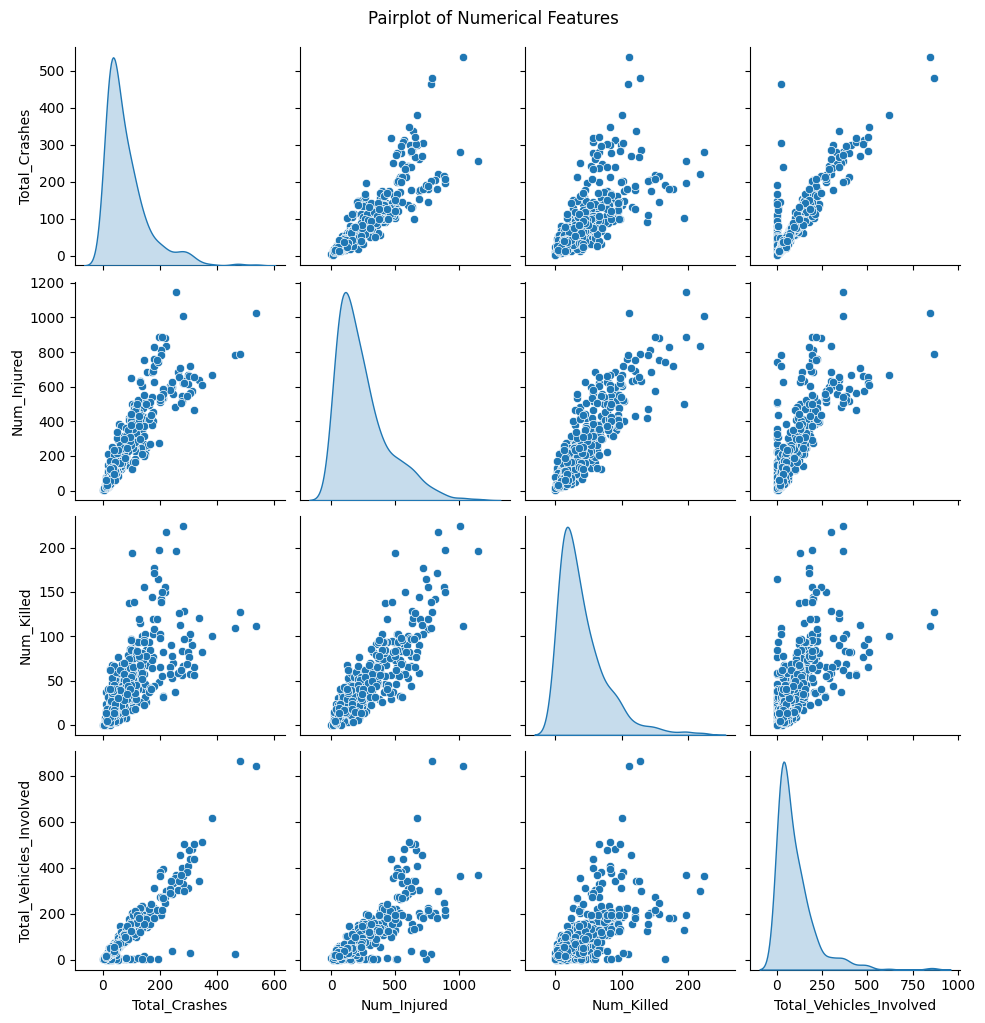

In [47]:
sns.pairplot(df[['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## **16) Distribution of Number of Injuries**

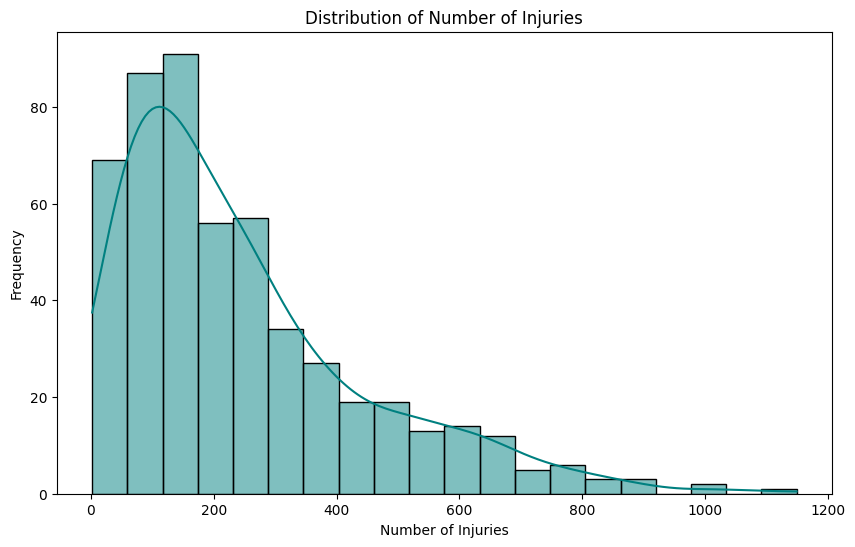

In [49]:


# Histogram to show the distribution of the number of injuries
plt.figure(figsize=(10, 6))
sns.histplot(df['Num_Injured'], bins=20, kde=True, color='teal')
plt.title('Distribution of Number of Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.show()



## **17)Total Crashes per State**

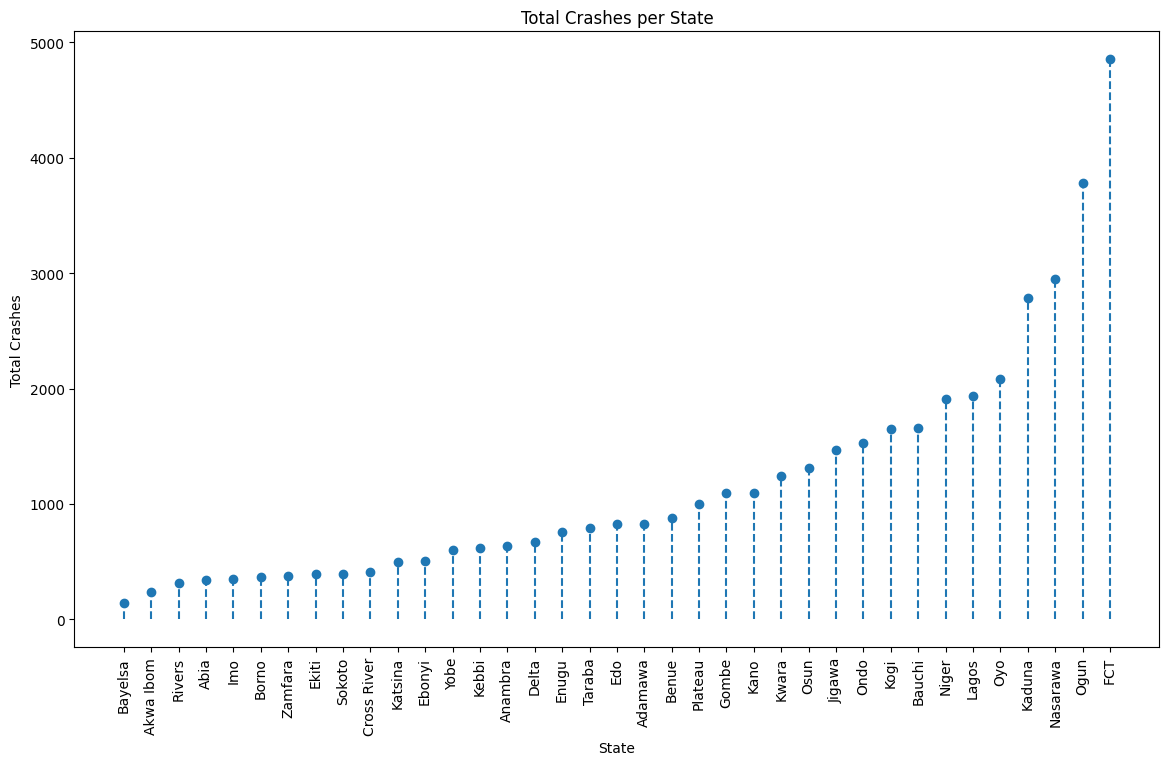

In [50]:
# Lollipop chart for total crashes per state
state_crashes = df.groupby('State')['Total_Crashes'].sum().sort_values()

plt.figure(figsize=(14, 8))
plt.stem(state_crashes.index, state_crashes.values, linefmt='--', markerfmt='o', basefmt=' ')
plt.title('Total Crashes per State')
plt.xlabel('State')
plt.ylabel('Total Crashes')
plt.xticks(rotation=90)
plt.show()

## **18) Number of Vehicles Involved vs. Number of Injuries**


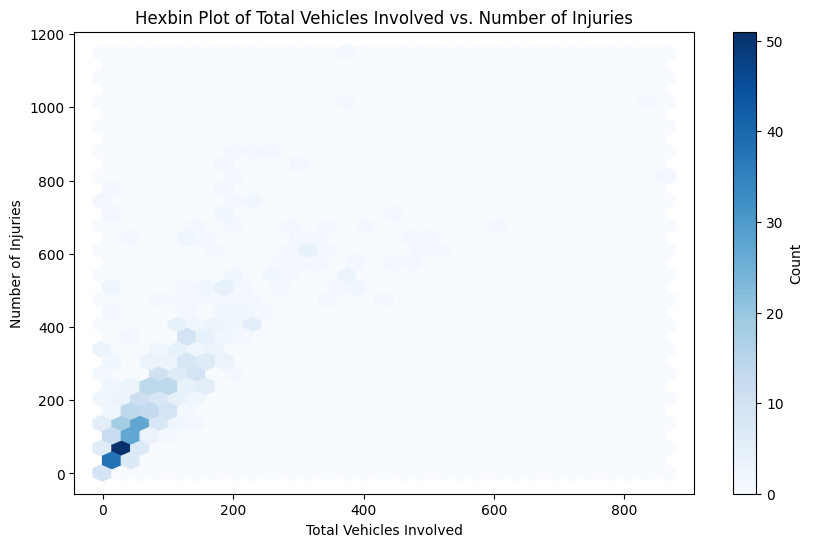

In [51]:
# Hexbin plot for number of vehicles involved vs. number of injuries
plt.figure(figsize=(10, 6))
plt.hexbin(df['Total_Vehicles_Involved'], df['Num_Injured'], gridsize=30, cmap='Blues')
cb = plt.colorbar(label='Count')
plt.title('Hexbin Plot of Total Vehicles Involved vs. Number of Injuries')
plt.xlabel('Total Vehicles Involved')
plt.ylabel('Number of Injuries')
plt.show()

## **19)Parallel Coordinates Plot to analyze the relationship between multiple features**

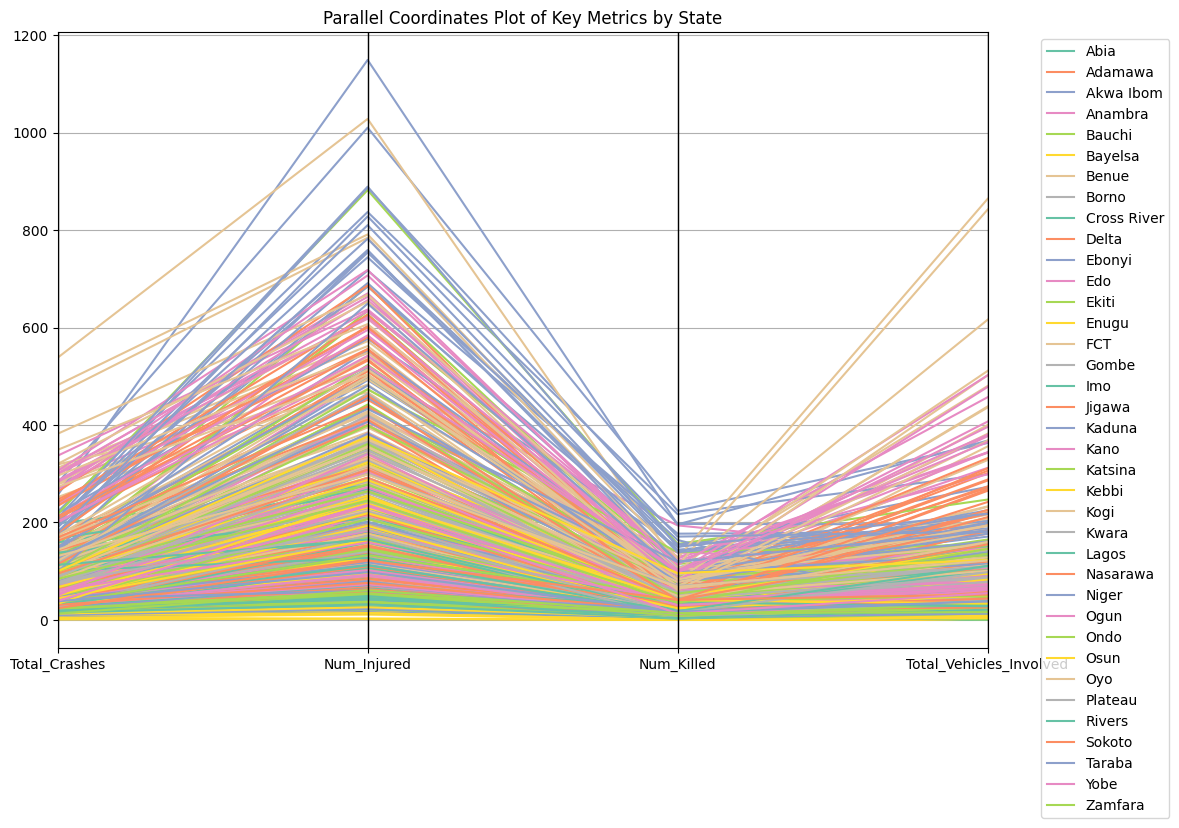

In [52]:
from pandas.plotting import parallel_coordinates

# Parallel Coordinates Plot to analyze the relationship between multiple features
plt.figure(figsize=(12, 8))
parallel_coordinates(df, 'State', cols=['Total_Crashes', 'Num_Injured', 'Num_Killed', 'Total_Vehicles_Involved'], color=sns.color_palette("Set2"))
plt.title('Parallel Coordinates Plot of Key Metrics by State')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **20)Distribution of Crashes Over Quarters for Each State**

In [53]:
pip install joypy

<Figure size 1400x2500 with 0 Axes>

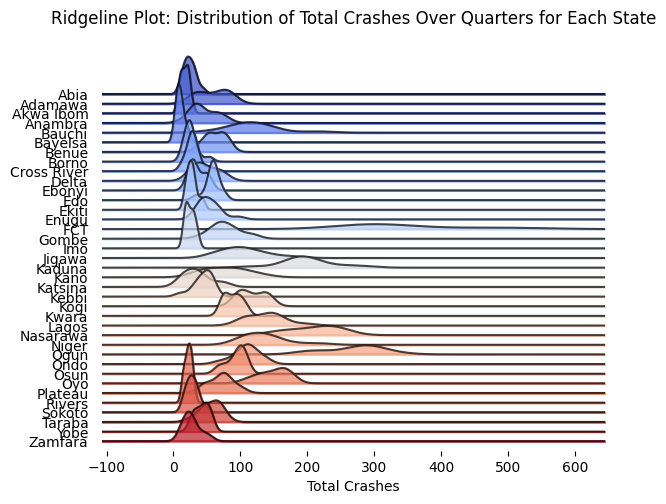

In [54]:
import joypy

# Ridgeline plot to show the distribution of crashes over quarters for each state
plt.figure(figsize=(14, 25))
joypy.joyplot(data=df, by='State', column='Total_Crashes', colormap=sns.color_palette("coolwarm", as_cmap=True), alpha=0.7, linewidth=1.5)
plt.title('Ridgeline Plot: Distribution of Total Crashes Over Quarters for Each State')
plt.xlabel('Total Crashes')
plt.show()